## Introduction

Blundell et al. [1] claimed that a Bayesian neural network can acheive better performance by using a scale mixture of diagonal Gaussian distributions as a prior instead of using a single Gaussian prior, see the figure below. They used MNIST data to feed a two-layered neural network to perform a classification task. 

<img src="images/test_error" height="420" width="420" >


Rather than using the analytical form, Blundell et al. approximated the expectation of the log of the prior and variational distribution with respect to the variational distrubtion using Monte Carlo integration which will be used in this work. 

Having seen the table of results in the figure below, a question  may arise here which is: have the authors selected the proper hyperparameters for the prior distribution before making any comparison with other works? 

In this notebook, we invistigate the role of the regularizer namely, complexity loss which is the sum of the log of the variational distribution and the negative of the log of the prior distribution

$$ L=L1 ( \text { Complexity loss })  + L2 ( \text {Error loss} )$$


Answers will be given to the follwoing two questions: 

1- What role does the standard deviation of the prior play?

2- What role does the standard deviation of the variational distribution play?


## Setup
Input data: 50 k training images containing hand-written characters.  
Model: Two-layered neural network each hidden layer consists of 400 neurons
Output: The output layer consists of 10 neurons which represent the target classes ranging between 0 and 9. 

$$ L(w,\alpha, \theta, x_i, y_i)=\frac{1}{L} \sum_{n=1}^{L}logq_{\theta}(w^{(n)})-logp_{\alpha}(w^{(n)})-logp(y_i|x_i,w^{(n)})$$ 



"L" represents the number of samples drawn from the variational distributions placed over the model's parameters while "i" indicates the index of the training example. 


The parameters of the prior distribution
$$\alpha = (\mu_p=0 , \sigma_p)$$  

The parameters of the variational distribution
$$\theta =(\mu , \sigma)$$

## The role of $logp(w)$


The log prior is computed as: 
$ \text {prior_ loss} = -\sum_{n=1}^{L} log p(w^{(n)}) $

#### Question: 

Does the prior loss have a negative contribution to the objective function for all the model's parameters? 

#### Answer: 

In the case of a Gaussian prior, the magnitude and sign of the contribution made by the log prior loss is mainly dependent on the parameters of the prior distribution in addition to the dynamic range of the models's parameters (Ws) which are sampled from the varioational distribution as shown in the following figures. For a standard Normal prior N(0,1), the contribution of the  prior loss is always positive with very small magnitude. 


<img src="images/-logp(w).png" >

- We can see from the figure above that -logp(w), except for N(0.,1.), takes positive and negative values. Why?


$$ \text{Prior loss}=-logp(w; 0., \sigma_p) = log \sqrt{2 \pi} + log \sigma_p + \frac{w^2}{2\sigma_p^2}$$


if $\sigma_p \geq  1. \implies log \sigma_p>0 $  and the prior loss is always positive. 

if $\sigma_p < 1. \implies log \sigma_p<0 $ and the prior loss has negative and positive regions, due to the effect of the other terms

#### The derivative of prior loss with respect to W: 

$$ \frac{\partial \text{Prior loss}}{\partial w}=\frac{w}{\sigma_p^2}$$

- The above equation shows that the gradient of the prior loss with respect to W has the same sign of w which means that updating Ws ($w=w-\lambda [  \frac{\partial L1}{\partial w} + \frac{\partial L2}{\partial w}] )$ pushes them towards zero. Also, large weights are more penalized due to their large magnitude. Not only this, if the prior's standarded deviation  is less than one, it applies extra penalty to weights. 


- The smoothness of the prior which is a function of $\sigma_p$ mainly affects $\mu$. The smaller values of $\sigma$, the sharper the prior and the more $\mu$ is concentrated around zero (please see the section "Histogram for $\mu$ and $w$ " below. 

# Loss function (L=L1+L2) for different priors 

#### LU: N(0.,1.), RU: N(0.,0.367), LD: N(0., 0.135), RD: N(0., 0.05)

<table><tr><td><img src='images/1.0/loss.png'></td><td><img src='images/0.367/loss.png'></td></tr><tr><td><img src='images/0.135/loss.png'></td><td><img src='images/0.05/loss.png'></td></tr></table>

#### Question: 

Why does the history of the loss function (L) have a linear part?

#### Answer: 

The logq(w) is a linear function of $\rho$ with a slope of -1. please see the section "The role of $logq(w)$" below. This function is responsible for making the loss function behave linearly as training progresses. 

# Prior loss =-logp(w) for different priors 

#### LU: N(0.,1.), RU: N(0.,0.367), LD: N(0., 0.135), RD: N(0., 0.05)
<table><tr><td><img src='images/1.0/log_prior.png'></td><td><img src='images/0.367/log_prior.png'></td></tr><tr><td><img src='images/0.135/log_prior.png'></td><td><img src='images/0.05/log_prior.png'></td></tr></table>

From the histograms of the mean $\mu$  and standard deviation $\sigma$ of the resulted variaytional distributions for the model's parameters after training is completed (see figures below), we can see that as the standard deviation of the prio distribution $\sigma_p$  increases, $ \mu$ and $\sigma$ increases, which in turn increases the dynamic range of the weights. This makes the prior loss (-logp(w)) increases.


# Histogram for $\mu$ and $w$
#### LU: N(0.,1.), RU: N(0.,0.367), LD: N(0., 0.135), RD: N(0., 0.05)


<table><tr><td><img src='images/1.0/hist_mus_w.png'></td><td><img src='images/0.367/hist_mus_w.png'></td></tr><tr><td><img src='images/0.135/hist_mus_w.png'></td><td><img src='images/0.05/hist_mus_w.png'></td></tr></table>

# Histogram for $\sigma$ 
#### LU: N(0.,1.), RU: N(0.,0.367), LD: N(0., 0.135), RD: N(0., 0.05)


<table><tr><td><img src='images/1.0/hist_sigma.png'></td><td><img src='images/0.367/hist_sigma.png'></td></tr><tr><td><img src='images/0.135/hist_sigma.png'></td><td><img src='images/0.05/hist_sigma.png'></td></tr></table>

# The regularizer without logq(w) for prior N(0,1)
#### row 0: 1- logp(w) with logq(w), 2-logp(w) without logq(w)
#### row1: 1- Histogram for $\mu$ and $w$ with logq(w) 2- Histogram for $\mu$ and $w$ without logq(w)

#### row2: 1- Histogram for $\sigma$ with logq(w) 2- Histogram for $\sigma$ without logq(w)
 
<table><tr><td><img src='images/1.0/log_prior.png'></td><td><img src='images/1.0/log_prior_without_logq(w).png'></td></tr><tr><td><img src='images/1.0/hist_mus_w.png'></td><td><img src='images/1.0/hist_mus_w_without_logq(w).png'></td></tr><tr><td><img src='images/1.0/hist_sigma.png'></td><td><img src='images/1.0/hist_sigma_without_logq(w).png'></td></tr></table>

# The regularizer without logq(w) for prior N(0,0.367)
#### row 0: 1- logp(w) with logq(w), 2-logp(w) without logq(w)
#### row1: 1- Histogram for $\mu$ and $w$ with logq(w) 2- Histogram for $\mu$ and $w$ without logq(w)

#### row2: 1- Histogram for $\sigma$ with logq(w) 2- Histogram for $\sigma$ without logq(w)
<table><tr><td><img src='images/0.367/log_prior.png'></td><td><img src='images/0.367/log_prior_without_logq(w).png'></td></tr><tr><td><img src='images/0.367/hist_mus_w.png'></td><td><img src='images/0.367/hist_mus_w_without_logq(w).png'></td></tr><tr><td><img src='images/0.367/hist_sigma.png'></td><td><img src='images/0.367/hist_sigma_without_logq(w).png'></td></tr></table>

It can be seen that the removal of logq(w) shifts the distribution of $\sigma$ downwards which emphasizes the role of logq(w) in increasing $\sigma$ as training progresses(row 3). The distribution of w shrinks (row 2). This makes both L1 and W decrease. 

## The role of $logq(w)$

Variational distribution: $q_{\theta}(w) = N_{\mu, \sigma}(w)$


$$ logq_{\theta}(w)= logN(w; \mu, \sigma)$$

$$ =log[ \frac{1}{\sqrt{2 \pi}\sigma} e^{\frac{(w-\mu)^2}{2\sigma^2}}]$$

$$= log[ \frac{1}{\sigma}] + log[\frac{1}{\sqrt{2 \pi}}e^{\frac{(\frac{w-\mu}{\sigma})^2}{2}}]$$


$$ w=\mu+\sigma\epsilon \text{   ;   } \epsilon \text{ ~ } N(0,1)$$


$$= log[ \frac{1}{\sigma}] + log[\frac{1}{\sqrt{2 \pi}}e^{\frac{\epsilon^2}{2}}]$$




$$ logN(w; \mu, \sigma)= log \frac{1}{\sigma}+ log N(\epsilon, 0,1)   ....(*)$$

$$ logN(w; \mu, \sigma)= -log\sigma+ log N(\epsilon, 0,1)   $$

$$ \rho=log\sigma \implies \sigma=e^{\rho} $$ 

$$ log q_{\theta}(w)= logN(w; \mu, \sigma)= -\rho+ log N(\epsilon, 0,1)   ....(**)$$


- Note that the variational loss $ logq_{\theta}(w)$ decreases as $\rho$ increases. This is equivalent to maximising uncertainly by widely spreading the mass of  $q(w)$. See the interpretation section in Variational Inference Part I



In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def log_gauss(x,mu=0.,sigma=0.367): 
    dist=tf.distributions.Normal(loc=mu, scale=sigma)
    return dist.log_prob(x)


dist=tf.distributions.Normal(loc=0., scale=1.)
ep=dist.sample(1)
w=2.0+2.*ep
v1=log_gauss(w,mu=2.0,sigma=2.)
v2=log_gauss(ep,mu=0.,sigma=1.)

sess=tf.Session()
sess.run([v1, v2-np.log(2.)])


[array([-1.6270049], dtype=float32), array([-1.6270049], dtype=float32)]

The $logq(w)$ is independent of $\mu$. It consists of two terms: $log \frac{1}{\sigma}$  and $log N(\epsilon, 0,1)$. The second term is independent of the parameters of $\mu$ and $\sigma$ while the first term decreases with increasing $\sigma$ as shown in the figure below. This means that $\rho$ should be increased as to  optimise the objective function. 


/home/bashar/anaconda3/envs/conda_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


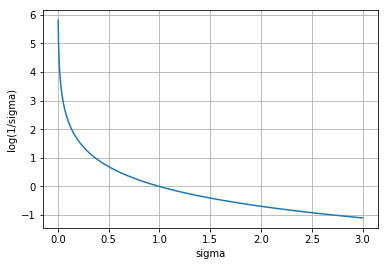

In [4]:
sigma=np.linspace(0.,3., 1000)
y=np.log(1/sigma)

plt.plot(sigma,y)
plt.xlabel('sigma')
plt.ylabel('log(1/sigma)')
plt.grid(True)


Note that 99.7% of the samples $\epsilon$ drawn from $N(0,1)$ lie in the range [-3, 3]. Let us plot the function logN(0,1) for that range. $logN(0,1)$  is always negative. 
 


<img src="images/logN.jpg">

Suppose that $log\sigma=-3$, using the standard Normal table we find that the percent of samples which are greater than 2.04 and less than -2.04 is 4.13%. The log of the normal distribution for these samples is less than -3.. As a conswequence 4.13% of the model parameters have negative contribution to the logq(w) loss.


$ logq(w)=N*3+ \sum_{i=1}^{N}logN(\epsilon_i;0,1) \geq 0$ N is the number of model's parameters. 

The table below shows how the percentage of the model's parameters, having a negative contribution to $logq(w;\mu,\sigma)$, changes with $log\sigma$ 

<img src="images/table.jpg">

# logq(w)
#### LU: N(0.,1.), RU: N(0.,0.367), LD: N(0., 0.135), RD: N(0., 0.05)

<table><tr><td><img src='images/1.0/log_variational.png'></td><td><img src='images/0.367/log_variational.png'></td></tr><tr><td><img src='images/0.135/log_variational.png'></td><td><img src='images/0.05/log_variational.png'></td></tr></table>

## Question: How does  $\rho$ affect $logq(w) $ and $ logp(w) $ ?

This mainly depends on how significant $\rho$ in eq(**) changes over iterations. Let us assume that the initial values of $\rho$ are drawn fron N(-3, 0.1). We run two scenarios: 




#### 1- when $\rho$ is fixed during training

 Left: -logp(w), Right: logq(w)

<table><tr><td><img src='images/prior_loss_untrainable_N(0,1).png'></td><td><img src='images/var_loss_untrainable_N(0,1).png'></td></tr></table>

$ logq(w) $  has a Gaussian distribution due to the fact that it consists of a constant and Gaussian distribution.

#### 2- when $\rho$ is trainable 

 Left: -logp(w), Right: logq(w)

<table><tr><td><img src='images/prior_loss_trainable_N(0,1).png'></td><td><img src='images/var_loss_trainable_N(0,1).png'></td></tr></table>

$logp(w)$ changes withing a small range 


# Test Accuracy 
It is computed for two different priors: N(0,1) and N(0,0.367). Three scenarios are considered here:

1- The full regularizer (L1) exists

2- The logq(w) is removed. 

3- The full regularizer (L1) exists and $\rho$ is not trainable (fixed) during training. 

<table>
<tr><td>Prior</td><td> Test Accuracy</td><td> Test Accuracy without logq(w)</td> <td> with fixed $\rho$ </td></tr>
<tr><td>N(0,1)</td><td> 98.50</td><td> 98.54</td><td> 98.46</td></tr>
<tr><td>N(0,0.367)</td><td> 98.56</td><td> 98.48</td><td> 98.42</td></tr>



</table>

# Conclusion

In this file we have investigated the role of the regularizer including -logp(w) and logq(w) in addition to the role of $\sigma$ of q(w) in two cases: trainable and fixed. 

Results show that

-  the variational loss $ logq_{\theta}(w)$ decreases as $\sigma$ increases which leads to wide spread of the mass of $q(w)$ 

- With decreasing standard deviation, the prior pushes the mean of the variational distribution to concentrate around zero.

- using a single gaussian prior the test accuracy for the MNIST dataset is much higher than 98.18% claimed by [1]. 


 In this file we have investigated the role of the regularizer including -logp(w) and logq(w) in addition to the role of $\\sigma$ of q(w) in two cases: trainable and fixed. 
Results show that:
-   the variational loss $ logq_{\theta}(w)$ is independent of the mean of the variational distribution but decreases as $\\sigma$ increases (see how variational loss linearly decreses  with $\sigma$), which broaden the variational distribution $q(w)$ and as a result increases parametes' uncertainity.
   

- With decreasing prior standard deviation, optimising the prior loss  pushes the mean of the variational distributions to concentrate around zero by penalyzing large weights (please refer to the derivative of the prior loss with repsect to W. Also, The prior loss is impacted by the variationl loss. Larger wights drawn from the variational distributions contributes more to prior loss.


-  using a single gaussian prior the test accuracy for the MNIST dataset is  higher than 98.18% claimed by [1].

References:

1 - Blundell, Charles, et al. "Weight uncertainty in neural networks." arXiv preprint arXiv:1505.05424 (2015).